In [1]:
!pip install tsfel

     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 793 kB 11.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 380 kB 48.8 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is

Peguei dataset do exemplo de leitura lá na documentação do tsfel

In [2]:
import tsfel
import zipfile
import numpy as np
import pandas as pd

# Load the dataset from online repository
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

# Unzip the dataset
zip_ref = zipfile.ZipFile("UCI HAR Dataset.zip", 'r')
zip_ref.extractall()
zip_ref.close()

# Store the dataset as a Pandas dataframe.
x_train_sig = np.loadtxt('UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', dtype='float32')
X_train_sig = pd.DataFrame(np.hstack(x_train_sig), columns=["total_acc_x"])

--2022-03-24 13:26:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  87.5MB/s    in 0.7s    

2022-03-24 13:26:52 (87.5 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]



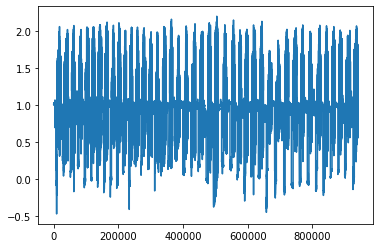

In [3]:
import matplotlib.pyplot as plt

plt.plot(X_train_sig)

In [ ]:
cfg_file = tsfel.get_features_by_domain()                                                        # If no argument is passed retrieves all available features
X_train = tsfel.time_series_features_extractor(cfg_file, X_train_sig, fs=50, window_size=250)    # Receives a time series sampled at 50 Hz, divides into windows of size 250 (i.e. 5 seconds) and extracts all features

In [ ]:
X_train.head()

In [ ]:
X_train.describe()

Vamos testar com um dataset

In [4]:
cbf_train = pd.read_csv('CBF_TRAIN.tsv', delimiter='\t', header=None)
cbf_train.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1,-0.464276,-0.555048,-0.842843,-0.865895,-0.936396,-0.817270,-0.263612,-1.258048,-1.250393,...,-1.331086,-1.083700,-1.017961,-0.916029,-1.134289,-0.920224,-0.789362,-0.638706,-0.963664,-1.245169
1,1,-0.896972,-0.685686,-1.351382,-1.458667,-1.165346,-1.403929,-1.821800,-0.831601,-1.016312,...,-1.062553,-1.568676,-1.364040,-1.155177,-0.995861,-1.163753,-0.916523,-0.582098,-1.259009,-1.392524
2,1,-0.464696,-0.567739,-0.032023,-0.635046,-0.602826,-0.266856,-0.267061,-0.931042,-0.449382,...,-0.286721,-0.637158,-0.155260,-0.688129,-0.885609,-0.766239,-0.865315,-0.284486,-0.687889,-0.887608
3,3,-0.187190,-0.620808,-0.815661,-0.521398,-0.790423,-0.967517,-1.487006,-0.277887,-0.835075,...,-0.908615,-0.726286,0.183778,-0.737444,-1.113997,-0.393987,-0.587889,-0.608232,-0.636465,-0.349029
4,2,-1.136017,-1.319195,-1.844624,-0.788692,-0.251715,-1.487603,-0.668764,-0.340360,-1.046382,...,-1.182911,-1.073514,-1.611362,-1.064340,-0.970736,-0.827281,-0.953538,-1.270185,-1.742758,-0.925944


In [5]:
cbf_train_labels = cbf_train[0]

In [6]:
cbf_train = cbf_train.drop(0, axis = 1)
cbf_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.817079,-0.882201,-0.844351,-0.976953,-1.076334,-1.057684,-0.939354,-0.868925,-0.986359,-0.934687,...,-0.769068,-0.583314,-0.490088,-0.562439,-0.673462,-0.646194,-0.607858,-0.678900,-0.801021,-0.729632
std,0.529125,0.466044,0.547590,0.440221,0.610145,0.456553,0.533715,0.440248,0.546810,0.463436,...,0.775207,0.764331,0.690728,0.683932,0.736295,0.670176,0.657181,0.690872,0.613758,0.483263
min,-1.945327,-1.839363,-1.844624,-1.914525,-2.313060,-1.899969,-2.154882,-1.653974,-2.265140,-1.800211,...,-1.848828,-1.946111,-1.611362,-1.534127,-1.852245,-1.576966,-1.742469,-1.941053,-2.111237,-1.768088
25%,-1.173821,-1.205991,-1.118274,-1.241626,-1.682533,-1.408781,-1.202432,-1.210433,-1.313459,-1.207153,...,-1.180316,-1.061934,-0.967960,-1.071869,-1.044709,-1.035455,-1.032168,-1.168407,-1.096079,-1.018777
50%,-0.764535,-0.890658,-0.829252,-1.032044,-0.984166,-1.105197,-1.027936,-0.954874,-0.946985,-0.956224,...,-0.930802,-0.673428,-0.632517,-0.718243,-0.860794,-0.784364,-0.794564,-0.673414,-0.936382,-0.728380
75%,-0.425967,-0.617240,-0.491672,-0.634343,-0.700697,-0.779065,-0.466412,-0.425824,-0.606959,-0.720763,...,-0.411472,-0.228579,-0.130998,-0.196304,-0.508221,-0.420463,-0.149227,-0.337305,-0.623986,-0.429875
max,0.045628,0.013128,0.342287,-0.038036,0.110781,-0.057289,-0.057041,-0.030007,0.002155,0.088190,...,2.039639,2.115751,1.498954,1.527989,1.688901,1.839214,0.984469,1.229552,0.839711,0.153169


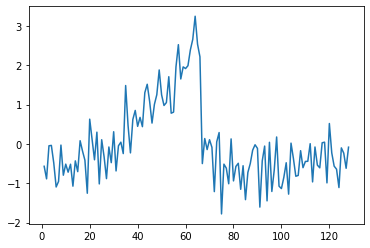

In [7]:
cbf_train.iloc[5].plot()

In [36]:
#não achei como fazer tudo de uma vez sem o for
cfg_file = tsfel.get_features_by_domain('temporal')

X_train = pd.DataFrame()


for i in range(0,cbf_train.shape[0]):
    this_example = tsfel.time_series_features_extractor(
        cfg_file, 
        pd.DataFrame({'ts' : cbf_train.iloc[i]}))
    X_train = X_train.append(this_example)

*** Feature extraction started ***
18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Using default sampling frequency set in configuration file.
  # Remove the CWD from sys.path while we load stuff.



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***


In [37]:
X_train.head()

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Entropy,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Peak to peak distance,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Total energy,0_Zero crossing rate
0,127.000000,1.170409,127.000000,0.621271,1.0,0.340844,-0.006149,0.241571,-0.010786,40.0,3.0,3.497997,40.0,139.433175,-0.004542,43.287197,100.000000,2.0
0,126.999999,1.143581,126.999999,0.674059,1.0,0.411610,-0.003902,0.325867,-0.060785,40.0,7.0,3.209974,41.0,141.980092,-0.008335,52.274425,99.999999,4.0
0,127.000000,1.129304,127.000000,0.571179,1.0,0.386032,-0.003330,0.342135,-0.043741,45.0,5.0,3.569803,45.0,140.209141,-0.009199,49.026018,100.000000,2.0
0,127.000000,0.953732,127.000000,0.423115,1.0,0.521253,-0.001274,0.433618,-0.082322,43.0,3.0,4.746290,42.0,149.592116,-0.008851,66.199152,100.000000,24.0
0,127.000000,1.024364,127.000000,0.746601,1.0,0.508425,0.001654,0.435294,0.018345,43.0,5.0,3.997955,42.0,148.504317,0.014407,64.569918,100.000000,20.0


Vamos ao scikit learn

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
clf.fit(X_train, cbf_train_labels)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'X[11] <= 3.76\ngini = 0.658\nsamples = 30\nvalue = [10, 12, 8]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 0.576\ngini = 0.48\nsamples = 20\nvalue = [0, 12, 8]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0]')]

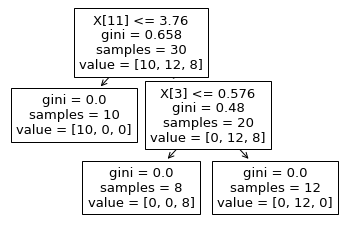

In [42]:
plot_tree(clf)

In [43]:
#leitura
cbf_test = pd.read_csv('CBF_TEST.tsv', delimiter='\t', header=None)


#separar rótulos
cbf_test_labels = cbf_test[0]
cbf_test = cbf_test.drop(0, axis = 1)


#extrair características
cfg_file = tsfel.get_features_by_domain('temporal')

X_test = pd.DataFrame()

for i in range(0,cbf_test.shape[0]):
    this_example = tsfel.time_series_features_extractor(
        cfg_file, 
        pd.DataFrame({'ts' : cbf_test.iloc[i]}))
    X_test = X_test.append(this_example)

*** Feature extraction started ***
18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Using default sampling frequency set in configuration file.



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***
*** Feature extraction started ***
18



*** Feature extraction finished ***


In [46]:
y_hat = clf.predict(X_test)
print(y_hat)

[2 2 1 2 2 3 1 3 2 3 2 1 3 2 2 3 3 3 2 1 2 2 2 1 2 3 3 3 1 3 2 2 1 3 2 3 3
 3 3 3 2 2 2 2 2 1 2 3 1 2 3 1 3 3 2 1 3 3 3 3 2 1 3 3 3 3 1 3 2 1 2 3 3 1
 2 2 2 2 3 2 1 1 1 1 3 3 3 1 3 1 3 1 2 2 3 2 3 3 1 3 2 2 1 3 2 3 3 3 1 2 3
 1 1 3 3 3 2 1 2 3 3 3 1 3 2 3 3 1 2 3 3 2 1 3 3 2 2 1 1 1 2 3 2 3 3 2 3 1
 2 1 3 3 2 1 3 2 3 2 3 3 2 3 2 2 3 1 2 3 3 3 2 3 1 1 3 3 2 1 3 1 2 1 2 3 2
 3 2 1 1 2 3 2 3 1 3 1 3 2 3 3 2 3 2 2 1 2 1 3 2 3 2 2 2 3 2 2 3 2 1 2 1 3
 3 3 2 1 3 3 3 3 2 3 3 1 2 2 3 2 1 3 2 3 2 1 2 3 2 1 3 1 2 2 3 1 2 3 3 3 1
 2 3 3 1 1 3 2 3 2 2 1 2 2 1 1 1 3 2 2 1 1 3 3 1 2 3 3 2 2 3 2 1 3 2 1 1 3
 2 1 2 2 2 3 3 3 2 3 3 1 3 2 3 1 2 3 3 2 1 2 3 3 3 3 2 3 3 1 1 2 3 1 3 1 3
 2 3 1 2 2 2 2 1 2 2 3 2 3 3 1 2 1 2 2 2 2 1 2 3 2 3 1 1 3 3 3 3 3 2 2 2 3
 2 2 3 2 3 1 3 3 2 2 3 3 3 1 2 1 1 3 2 2 1 2 2 2 1 3 3 3 3 1 2 3 3 2 1 2 3
 1 3 2 1 1 1 3 3 2 3 3 2 2 1 2 3 3 3 1 3 3 2 3 3 1 1 2 1 1 2 3 2 2 2 2 1 3
 2 3 3 3 3 1 3 2 1 2 1 1 3 3 2 1 1 2 2 3 3 2 2 2 3 2 1 3 3 3 1 1 2 1 1 3 2
 2 3 2 3 3 3 1 2 2 3 1 2 

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(cbf_test_labels, y_hat)

0.9066666666666666